# Matplotlib 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('taxis.csv')
df = df.dropna()
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


### Basic Graph

(100,) (100, 3)


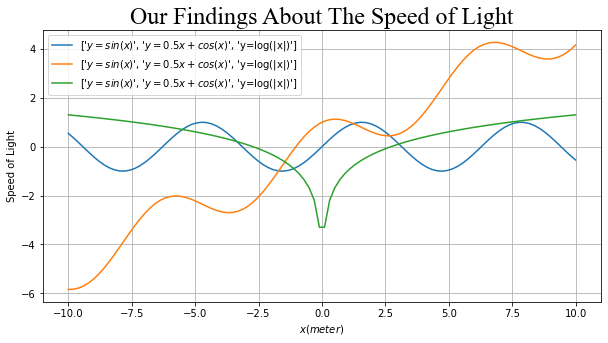

In [4]:
x = np.linspace(-10, 10, 100)

y1 = np.sin(x)
y2 = 0.5*x + np.cos(x)
y3 = np.log(np.abs(x))-1
yy = np.stack((y1, y2, y3)).T

print(x.shape, yy.shape)

plt.figure(figsize=(10, 5))
plt.plot(x, yy, label=['$y=sin(x)$', '$y=0.5x+cos(x)$', 'y=log(|x|)'])
plt.xlabel('$x (meter)$')
plt.ylabel('Speed of Light')
plt.title('Our Findings About The Speed of Light', fontdict={'fontname': 'Times New Roman', 'fontsize': 24})
plt.legend()
plt.grid()
plt.show()

 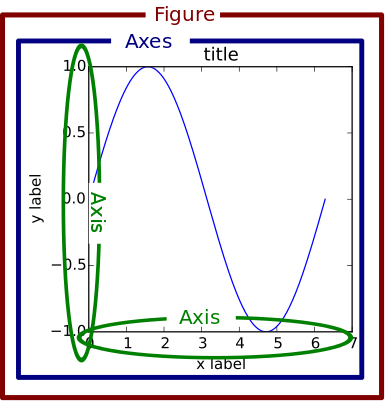

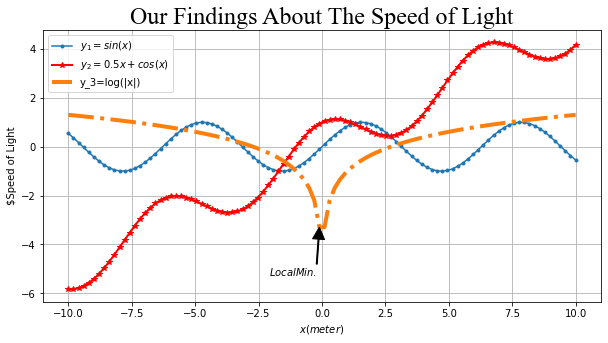

In [48]:
y1 = np.sin(x)
y2 = 0.5*x + np.cos(x)
y3 = np.log(np.abs(x))-1
yy = np.stack((y1, y2, y3)).T

plt.figure(figsize=(10, 5))
plt.plot(x, y1, label='$y_1=sin(x)$', marker='.', linestyle='-')
plt.plot(x, y2, label='$y_2=0.5x+cos(x)$', marker='*', linewidth=2, c='red')
plt.plot(x, y3, label='y_3=log(|x|)', linestyle='-.', linewidth=4)

plt.annotate('$Local Min.$',
             xy=[x[np.argmin(y3)], np.min(y3)],
             xytext=[x[np.argmin(y3)]-2, np.min(y3)-2],
             xycoords='data',
             textcoords='data',
             arrowprops=dict(facecolor='black', shrink=1, width=1))

plt.xlabel('$x (meter)$')
plt.ylabel('Speed of Light')
plt.title('Our Findings About The Speed of Light', fontdict={'fontname': 'Times New Roman', 'fontsize': 24})
plt.legend()
plt.grid()
plt.show()

### Histogram

In [50]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


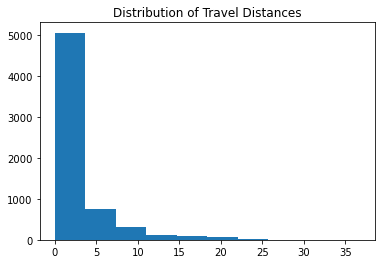

In [51]:
plt.hist(df['distance'])
plt.title('Distribution of Travel Distances')
plt.show()

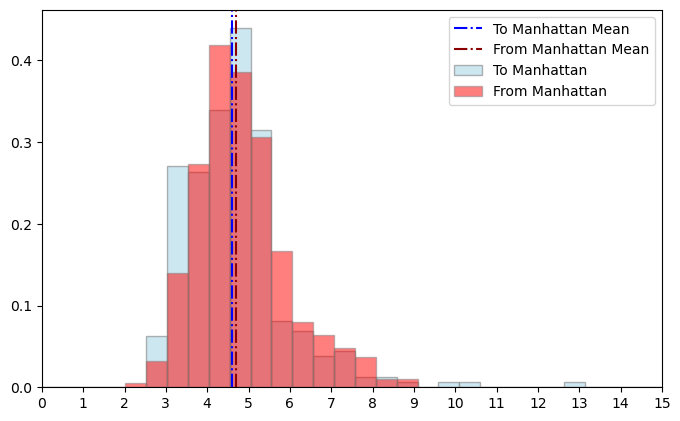

In [21]:
df['price_per_km'] = df['total'] / df['distance']
from_manhattan = df[(df.pickup_borough == 'Manhattan') & (df.dropoff_borough != 'Manhattan')].price_per_km
to_manhattan = df[(df.pickup_borough != 'Manhattan') & (df.dropoff_borough == 'Manhattan')].price_per_km
plt.figure(figsize=(8, 5), dpi=100)

plt.hist(to_manhattan, alpha=0.6, density=True, bins=np.linspace(0, 50, 100), label='To Manhattan', edgecolor='grey', color='lightblue') 
plt.hist(from_manhattan, alpha=0.5, density=True, bins=np.linspace(0, 50, 100), label='From Manhattan', edgecolor='grey', color='red')
# What happens if we set `density` to False?

plt.axvline(to_manhattan.mean(), linestyle='-.', color='blue', linewidth=1.5, label='To Manhattan Mean')
plt.axvline(from_manhattan.mean(), linestyle='-.', color='darkred', linewidth=1.5, label='From Manhattan Mean')
plt.legend()
plt.xticks(np.arange(0, 50))
plt.xlim([0, 15])
plt.show()

**How many bins?**
- 5 to 20 might be reasonable values.
- Sturge’s Rule: $K = 1 + 3.322 log (N)$
- Scott’s Rule
- Rice’s Rule
- Freedman-Diaconis’s Rule: $\dfrac{2.IQR}{N^{1/3}}$

### Box Plot

     
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
outlier           <----------->            outlier
                       IQR

In [88]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [89]:
df.pickup_borough.unique()

array(['Manhattan', 'Queens', nan, 'Bronx', 'Brooklyn'], dtype=object)

/Users/Rooholah/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


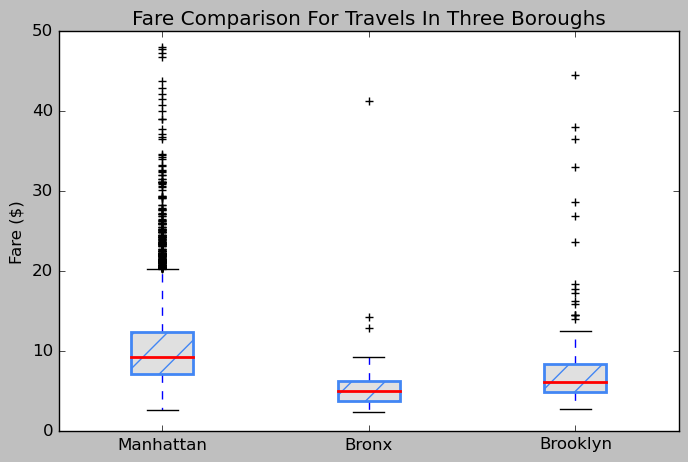

In [24]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('classic') # bmh classic dark_background fast fivethirtyeight ggplot

in_manhattan = df.loc[(df.pickup_borough == 'Manhattan') & (df.dropoff_borough == 'Manhattan'), 'price_per_km']
in_bronx = df.loc[(df.pickup_borough == 'Bronx') & (df.dropoff_borough == 'Bronx'), 'price_per_km']
in_brooklyn = df.loc[(df.pickup_borough == 'Brooklyn') & (df.dropoff_borough == 'Brooklyn'), 'price_per_km']

bp = plt.boxplot([in_manhattan, in_bronx, in_brooklyn], labels=['Manhattan','Bronx','Brooklyn'], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Fare Comparison For Travels In Three Boroughs')
plt.ylabel('Fare ($)')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    box.set(hatch = '/')
    
plt.ylim([0, 50])
plt.show()

In [25]:
len(in_manhattan), len(in_bronx), len(in_brooklyn)

(4857, 66, 280)

### Violin Plot

In [28]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,price_per_km
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,8.093750
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,11.772152
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,10.335766
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,4.798701
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,6.203704


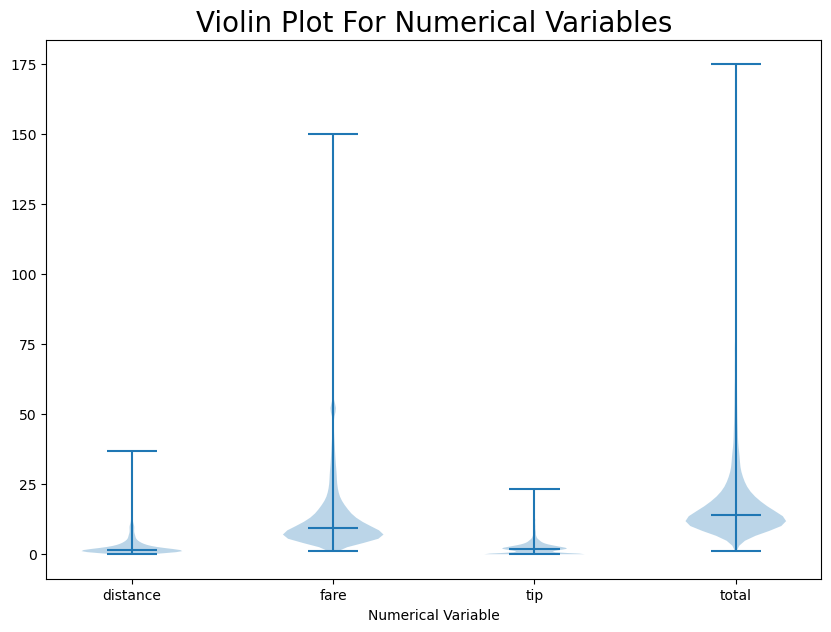

In [37]:
plt.style.use('default')

plt.figure(figsize=(10, 7))
plt.violinplot(df[['distance', 'fare', 'tip', 'total']].T, showmedians=True)

plt.xticks(ticks=np.arange(1, 5), labels=['distance', 'fare', 'tip', 'total'])
plt.xlabel('Numerical Variable')
plt.title('Violin Plot For Numerical Variables', fontdict={'fontsize': 20})
# plt.ylim([0, 50])
plt.show()

### Bar Plot

In [104]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


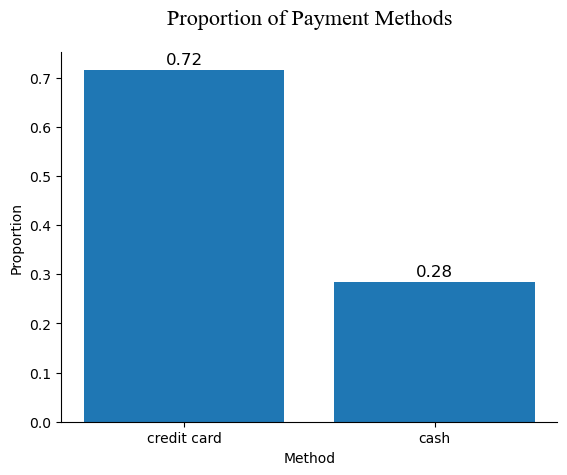

In [132]:
plt.style.use('default') # bmh classic dark_background fast fivethirtyeight ggplot

payment_methods = df.payment.value_counts(normalize=True)
p = plt.bar(payment_methods.index, payment_methods.values)
plt.bar_label(p, labels=np.round(payment_methods.values, 2), padding=2, fontsize=12)
plt.title('Proportion of Payment Methods', pad=20, fontdict={'font': 'Times New Roman', 'fontsize': 16})
plt.xlabel('Method')
plt.ylabel('Proportion')
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.show()

### Pie Chart (Don't!!)

In [30]:
pickup_boroughs = df.pickup_borough.value_counts()
pickup_boroughs

Manhattan    5226
Queens        638
Brooklyn      378
Bronx          99
Name: pickup_borough, dtype: int64

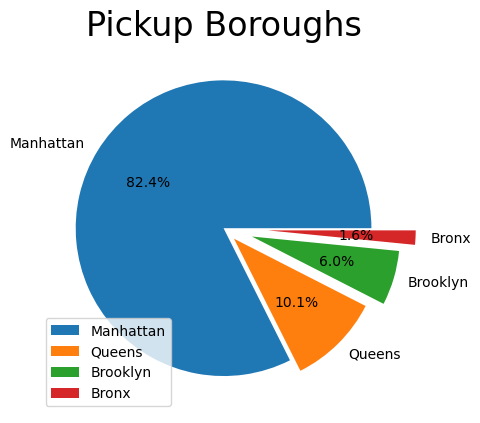

In [148]:
pickup_boroughs = df.pickup_borough.value_counts()
explode = [0, 0.1, 0.2, 0.3]
plt.pie(pickup_boroughs.values, labels=pickup_boroughs.index, autopct='%.1f%%', explode=explode)
plt.legend(loc='lower left')
plt.title('Pickup Boroughs', fontdict={'fontsize': 24})
plt.show()


### Heat Map (Imshow)

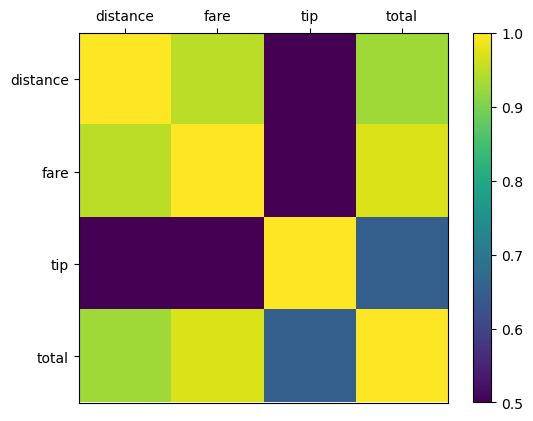

In [35]:
plt.style.use('default')
corr_df = df[['distance', 'fare', 'tip', 'total']].corr()
plt.imshow(corr_df, vmin=0.5, vmax=1)
plt.xticks(np.arange(0, 4), corr_df.index)
plt.yticks(np.arange(0, 4), corr_df.index)
plt.gca().xaxis.tick_top()
plt.colorbar()
plt.show()

### Scatter Plot

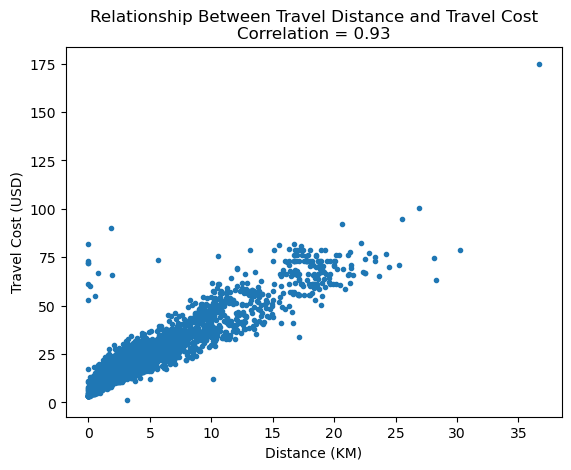

In [169]:
distance = df.distance
total_price = df.total
corr = np.corrcoef(distance, total_price)[0, 1]
plt.scatter(distance, total_price, marker='.')

plt.title(f'Relationship Between Travel Distance and Travel Cost\nCorrelation = {np.round(corr, 2)}')

plt.xlabel('Distance (KM)')
plt.ylabel('Travel Cost (USD)')
plt.show()

In [187]:
list(df.pickup_borough.cat.categories.values)

['Bronx', 'Brooklyn', 'Manhattan', 'Queens']

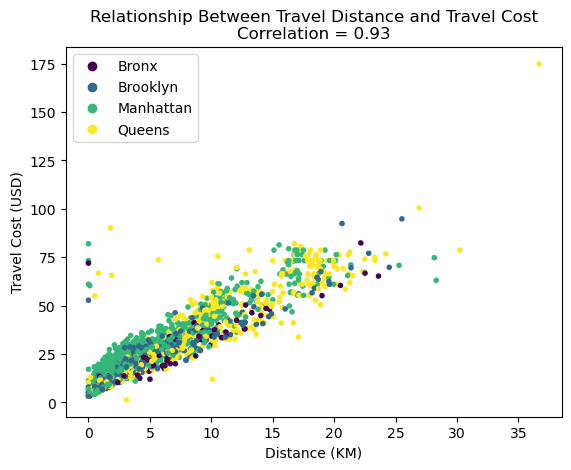

In [188]:
distance = df.distance
total_price = df.total
df.pickup_borough = df.pickup_borough.astype('category')


corr = np.corrcoef(distance, total_price)[0, 1]
scatter = plt.scatter(distance, total_price, marker='.', c=df['pickup_borough'].cat.codes)

plt.title(f'Relationship Between Travel Distance and Travel Cost\nCorrelation = {np.round(corr, 2)}')

plt.xlabel('Distance (KM)')
plt.ylabel('Travel Cost (USD)')
plt.legend(handles=scatter.legend_elements()[0], labels=list(df.pickup_borough.cat.categories.values))
plt.show()

### Multiple Plots

In [ ]:
fig, axes = plt.subplots(...)

### Nested Plots (Arbitrary Layout)

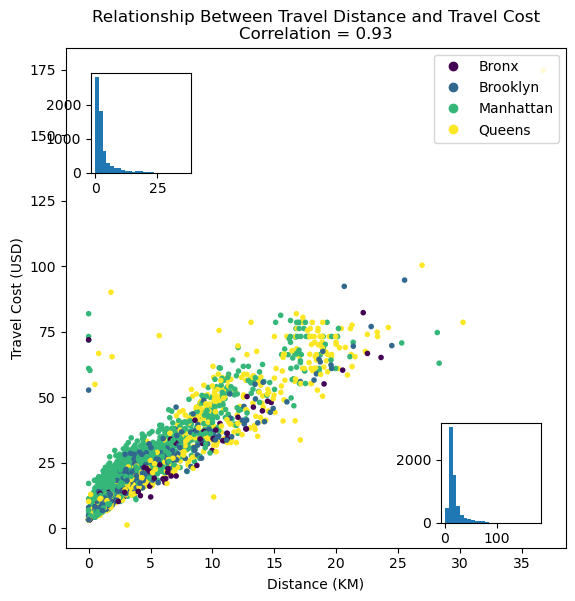

In [201]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.75, 0.05, 0.2, 0.2])
ax3 = fig.add_axes([0.05, 0.75, 0.2, 0.2])

plt.sca(ax1)
scatter = plt.scatter(distance, total_price, marker='.', c=df['pickup_borough'].cat.codes)
plt.title(f'Relationship Between Travel Distance and Travel Cost\nCorrelation = {np.round(corr, 2)}')
plt.xlabel('Distance (KM)')
plt.ylabel('Travel Cost (USD)')
plt.legend(handles=scatter.legend_elements()[0], labels=list(df.pickup_borough.cat.categories.values), loc='upper right')

plt.sca(ax2)
plt.hist(total_price, bins=25)

plt.sca(ax3)
plt.hist(distance, bins=25)
plt.show()